In [10]:
import numpy as np
import sympy as sp
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 240
import matplotlib.pyplot as plt
sp.init_printing()
import pyPLUTO as pp
import bachelorproject as bp
from matplotlib import colors, cm



In [19]:
gamma = 5/3
beta = 1
rho0 = 1
p0 = 1

va = np.sqrt(p0/(beta*rho0))
cs = np.sqrt(gamma*p0/rho0)
va = 1
vs = 1
theta = np.linspace(0, 8*np.pi/2, 400)+0.01

vphF = np.sqrt(.5*(va**2 + cs**2 + np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
vphS = np.sqrt(.5*(va**2 + cs**2 - np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
vphA = va*np.abs(np.cos(theta))

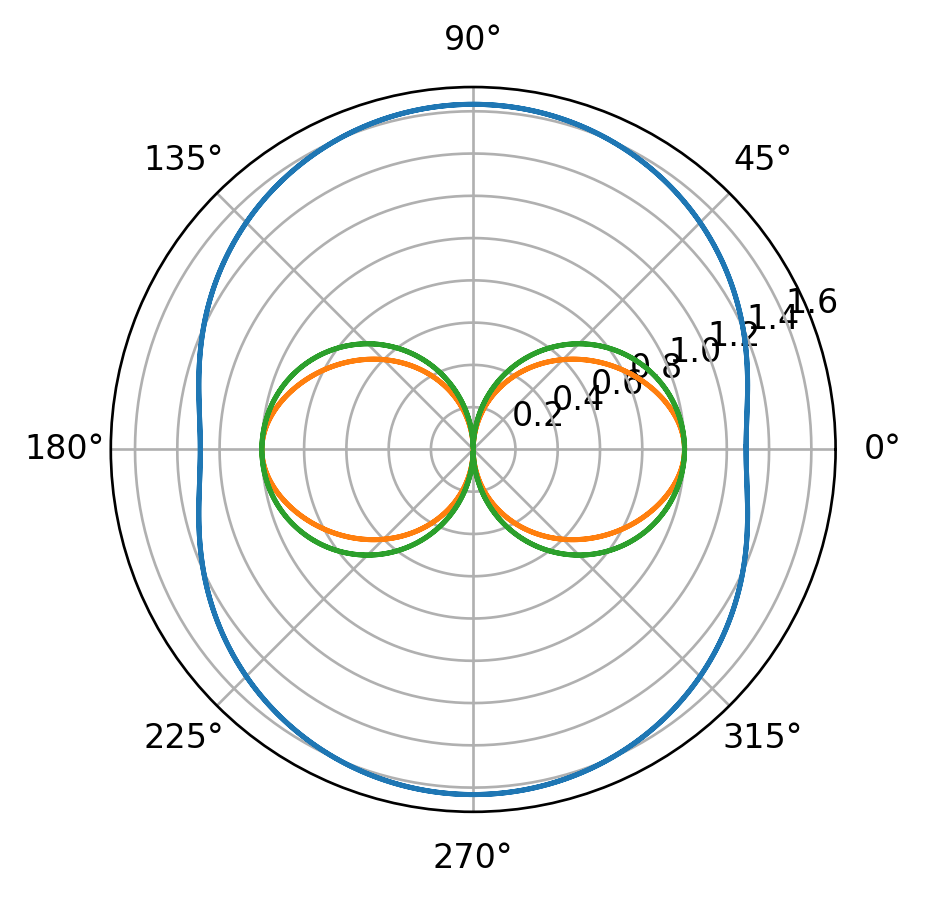

In [20]:
plt.polar(theta, vphF)
plt.polar(theta, vphS)
plt.polar(theta, vphA)

In [21]:
k_x = np.cos(theta)
k_y = np.sin(theta)
theta_x = -np.sin(theta)
theta_y = np.cos(theta)
vF_k = vphF
vF_theta = (1/(2*vphF))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

vS_k = vphS
vS_theta = -(1/(2*vphS))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

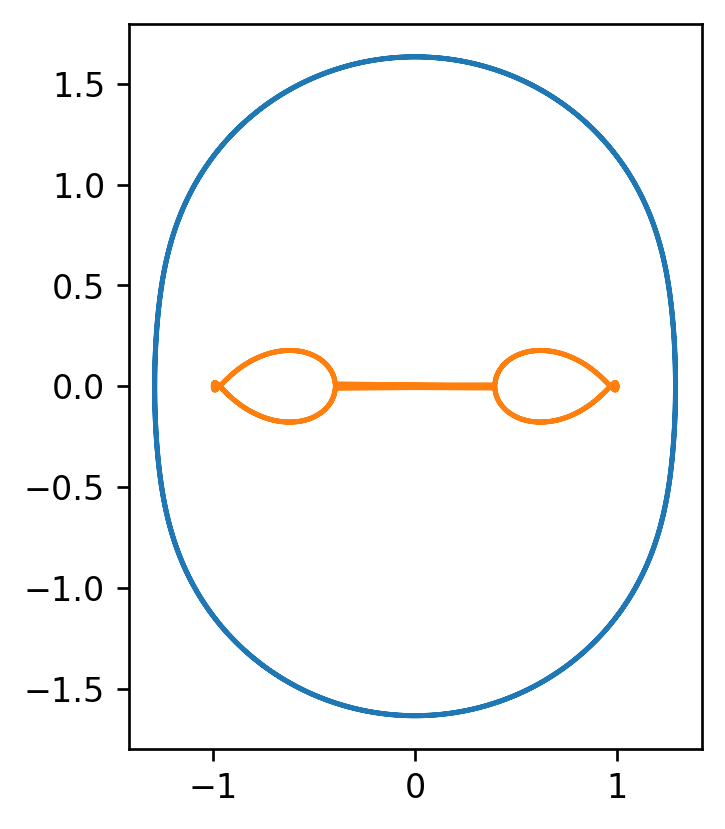

In [22]:
x_F = vF_k*k_x + vF_theta*theta_x
y_F = vF_k*k_y + vF_theta*theta_y
x_S = vS_k*k_x + vS_theta*theta_x
y_S = vS_k*k_y + vS_theta*theta_y
plt.plot(x_F, y_F)
plt.plot(x_S, y_S)

plt.axis('scaled')

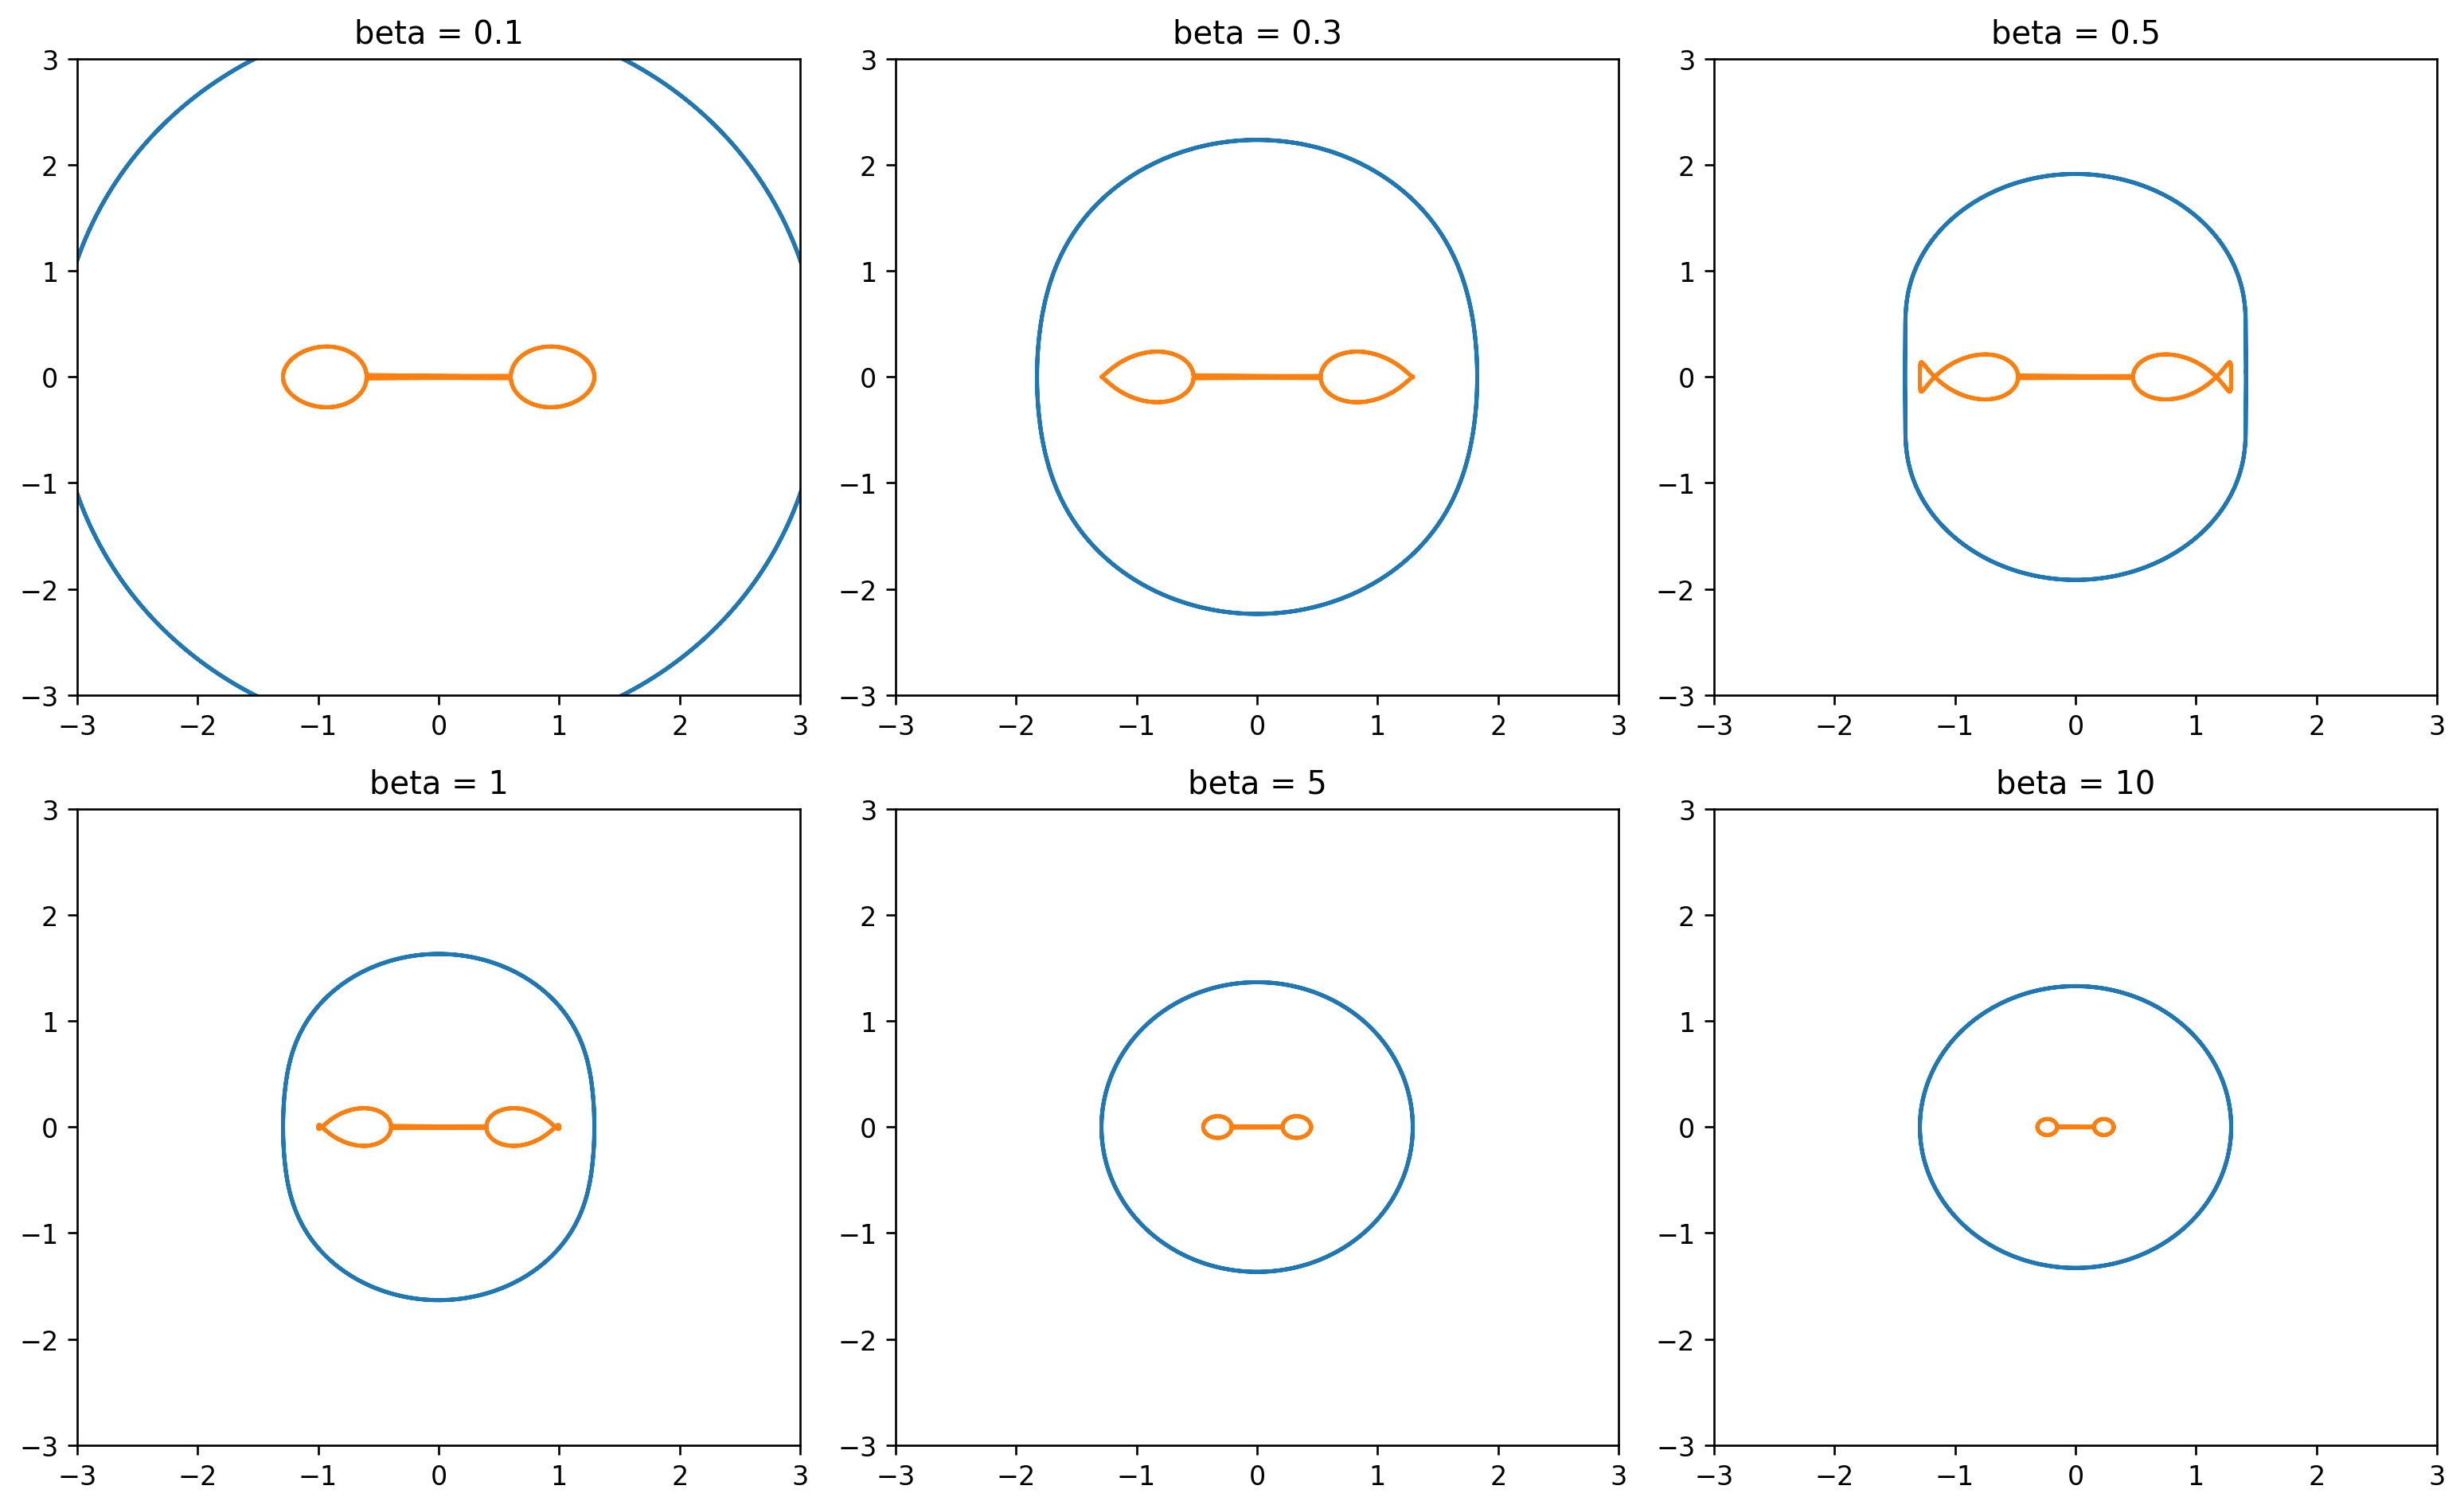

In [117]:
gamma = 5/3
rho0 = 1
p0 = 1
# betas = ["0.1", "0.3", "0.5", "1", "5", "10"]
betas = [.1, .3, .5, 1, 5, 10]
fig, ax, = plt.subplots(2,3, figsize = (13,8))

for i in range(6):
    axis = ax[i//3][i%3]
    beta = betas[i]

    va = np.sqrt(p0/(beta*rho0))
    cs = np.sqrt(gamma*p0/rho0)
    theta = np.linspace(0, 8*np.pi/2, 400)+0.01

    vphF = np.sqrt(.5*(va**2 + cs**2 + np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphS = np.sqrt(.5*(va**2 + cs**2 - np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphA = va*np.abs(np.cos(theta))

    k_x = np.cos(theta)
    k_y = np.sin(theta)
    theta_x = -np.sin(theta)
    theta_y = np.cos(theta)
    vF_k = vphF
    vF_theta = (1/(2*vphF))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

    vS_k = vphS
    vS_theta = -(1/(2*vphS))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))
    x_F = vF_k*k_x + vF_theta*theta_x
    y_F = vF_k*k_y + vF_theta*theta_y
    x_S = vS_k*k_x + vS_theta*theta_x
    y_S = vS_k*k_y + vS_theta*theta_y
    axis.plot(x_F, y_F)
    axis.plot(x_S, y_S)
    axis.set_title("beta = {}".format(beta))
    axis.set_xlim(-3, 3)
    axis.set_ylim(-3,3)
fig.tight_layout()

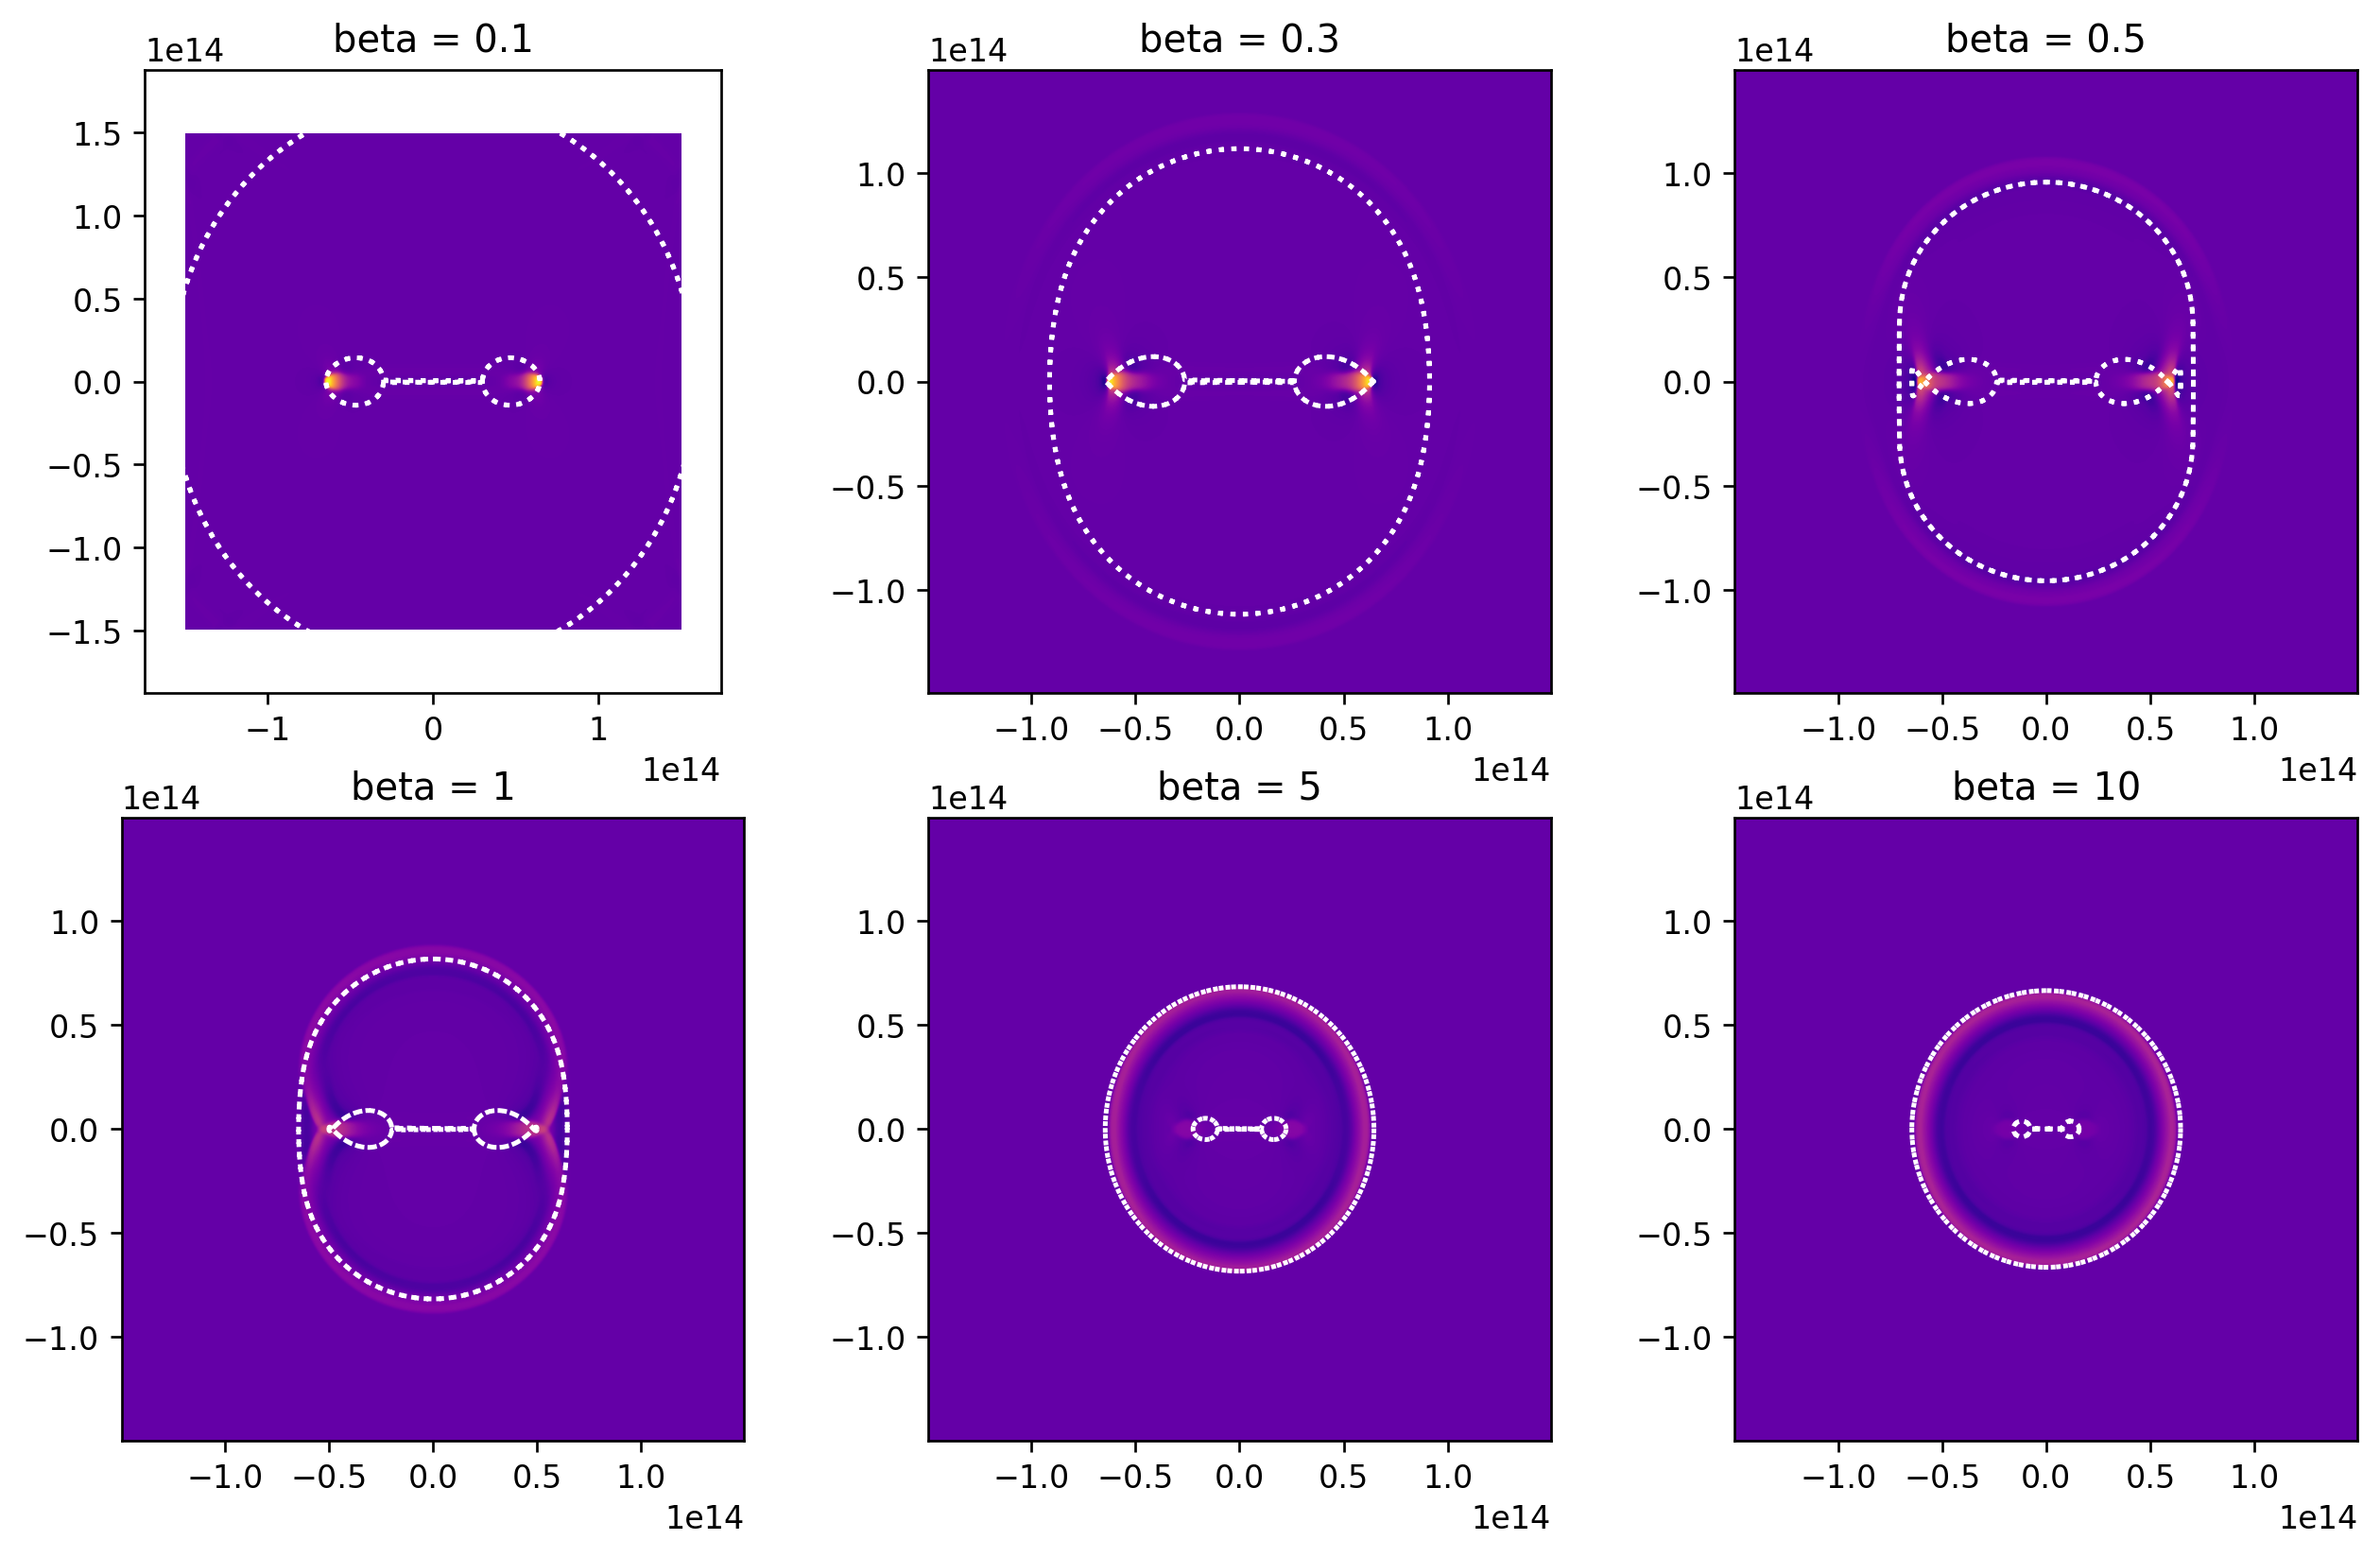

In [14]:
j = 100
gamma = 5/3
rho0 = 1
p0 = 1
betas_text = ["0.1", "0.3", "0.5", "1", "5", "10"]
betas = [.1, .3, .5, 1, 5, 10]
fig, ax, = plt.subplots(2,3, figsize = (13,8))

images = [pp.pload(j, "../pluto-definitions/blastwave_MHD/beta{}-low/".format(beta)) for beta in betas_text]
im = [0]*6
scale = 5.e13
vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)

for i in range(6):
    axis = ax[i//3][i%3]
    beta = betas[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm)

    va = np.sqrt(p0/(beta*rho0))
    cs = np.sqrt(gamma*p0/rho0)
    theta = np.linspace(0, 8*np.pi/2, 400)+0.01

    vphF = np.sqrt(.5*(va**2 + cs**2 + np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphS = np.sqrt(.5*(va**2 + cs**2 - np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphA = va*np.abs(np.cos(theta))

    k_x = np.cos(theta)
    k_y = np.sin(theta)
    theta_x = -np.sin(theta)
    theta_y = np.cos(theta)
    vF_k = vphF
    vF_theta = (1/(2*vphF))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

    vS_k = vphS
    vS_theta = -(1/(2*vphS))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))
    x_F = vF_k*k_x + vF_theta*theta_x
    y_F = vF_k*k_y + vF_theta*theta_y
    x_S = vS_k*k_x + vS_theta*theta_x
    y_S = vS_k*k_y + vS_theta*theta_y
    axis.plot(scale*x_F, scale*y_F, 'w', linestyle = ':')
    axis.plot(scale*x_S, scale*y_S, 'w', linestyle = ':')
    axis.set_title("beta = {}".format(beta))

fig.savefig("comparison_beta.png")


